In [24]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [25]:
#데이터 생성
np.random.seed(seed=1)
X_min = 4
X_max = 30
X_n = 16
X = 5+25*np.random.rand(X_n)
Prm_c = [170,108,0.2]#생성 매개 변수
T = Prm_c[0]-Prm_c[1]*np.exp(-Prm_c[2]*X)+4*np.random.randn(X_n)#X에서 T를 결정
np.savez('ch5_data.npz',X=X, X_min=X_min, X_max = X_max, X_n = X_n, T=T)

In [26]:
print(X)#데이터

[15.42555012 23.00811234  5.00285937 12.55831432  8.66889727  7.30846487
  9.65650528 13.63901818 14.91918686 18.47041835 15.47986286 22.13048751
 10.11130624 26.95293591  5.68468983 21.76168775]


In [27]:
print(np.round(X,2))#반올림

[15.43 23.01  5.   12.56  8.67  7.31  9.66 13.64 14.92 18.47 15.48 22.13
 10.11 26.95  5.68 21.76]


In [28]:
print(np.round(T,2))

[170.91 160.68 129.   159.7  155.46 140.56 153.65 159.43 164.7  169.65
 160.71 173.29 159.31 171.52 138.96 165.87]


In [29]:
help(np.savez)

Help on function savez in module numpy:

savez(file, *args, **kwds)
    Save several arrays into a single file in uncompressed ``.npz`` format.
    
    If arguments are passed in with no keywords, the corresponding variable
    names, in the ``.npz`` file, are 'arr_0', 'arr_1', etc. If keyword
    arguments are given, the corresponding variable names, in the ``.npz``
    file will match the keyword names.
    
    Parameters
    ----------
    file : str or file
        Either the filename (string) or an open file (file-like object)
        where the data will be saved. If file is a string or a Path, the
        ``.npz`` extension will be appended to the filename if it is not
        already there.
    args : Arguments, optional
        Arrays to save to the file. Since it is not possible for Python to
        know the names of the arrays outside `savez`, the arrays will be saved
        with names "arr_0", "arr_1", and so on. These arguments can be any
        expression.
    kwds : 

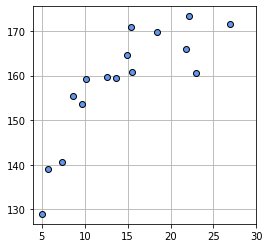

In [30]:
#데이터 그래프
#X와 T를 그래프로 표시
plt.figure(figsize=(4,4))
plt.plot(X,T,marker = 'o',linestyle = 'None',
        markeredgecolor = 'black', color = 'cornflowerblue')
plt.xlim(X_min, X_max)
plt.grid(True)
plt.show()

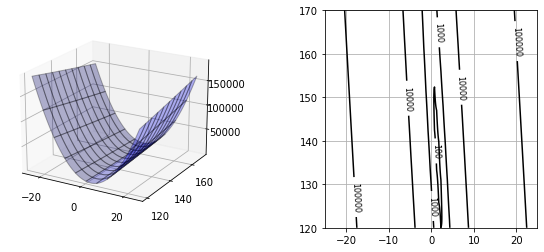

In [33]:
#W와 J의 관계를 그래프로 나타내기
from mpl_toolkits.mplot3d import Axes3D

def mse_line(x,t,w):#평균제곱함수 mse
    y = w[0]*x + w[1]
    mse = np.mean((y-t)**2)
    return mse

xn = 100#등고선 표시 해상도
w0_range = [-25,25]
w1_range = [120,170]
x0 = np.linspace(w0_range[0],w0_range[1],xn)
x1 = np.linspace(w1_range[0],w1_range[1],xn)
xx0,xx1 = np.meshgrid(x0,x1)
J = np.zeros((len(x0),len(x1)))

for i0 in range(xn):
    for i1 in range(xn):
        J[i1,i0] = mse_line(X,T,(x0[i0],x1[i1]))

#표시
plt.figure(figsize=(9.5,4))
plt.subplots_adjust(wspace =0.5)

ax = plt.subplot(1,2,1,projection = '3d')
ax.plot_surface(xx0,xx1,J,rstride = 10,cstride = 10,alpha=0.3,
               color = 'blue',edgecolor='black')
ax.set_xticks([-20,0,20])
ax.set_yticks([120,140,160])
ax.view_init(20,-60)

plt.subplot(1,2,2)
cont = plt.contour(xx0,xx1,J,30,colors='black',
                  levels =[100,1000,10000,100000])
cont.clabel(fmt='%1.0f',fontsize=8)
plt.grid(True)
plt.show()#평균제곱오차와 평균제곱오차의 등고선 표시

In [34]:
#평균제곱오차의 기울기
def dmse_line(x,t,w):#평균제곱오차의 기울기
    y = w[0]*x+w[1]
    d_w0 = 2*np.mean((y-t)*x)#w0에 대한 편미분
    d_w1 = 2*np.mean(y-t)#w1에 대한 편미분
    return d_w0, d_w1

In [35]:
d_W = dmse_line(X,T,[10,165])#w = [10,165]의 기울기
print(np.round(d_W,1))

[5046.3  301.8]


In [37]:
#경사하강법
def fit_line_num(x,t):#mse를 최소화하는 w를 돌려줌
    w_init =[10.0, 165.0]
    alpha = .001#학습률
    i_max = 100000#반복의 최대수
    eps = 0.1#반복을 종료 기울기의 절대값의 한계
    w_i = np.zeros([i_max,2])
    w_i[0,:] = w_init
    for i in range(1,i_max):
        dmse = dmse_line(x,t,w_i[i-1])#평균제곱오차의 기울기
        w_i[i,0] = w_i[i-1,0] - alpha*dmse[0]
        w_i[i,1] = w_i[i-1,1] - alpha*dmse[1]
        if max(np.absolute(dmse)) < eps:
            break#기울기가 충분히 작아지면 w의 갱신 종료
    w0 = w_i[i,0]
    w1 = w_i[i,1]
    w_i = w_i[:i,:]
    return w0,w1,dmse,w_i

In [ ]:
#메인
plt.figure(figsize=(4,4))#MSE의 등고선 표시
xn = 100#등고선 해상도
w0_range = [-25,25]
w1_range = [120,170]

x0 = np.linspace(w0_range[0],w0_range[1],xn)
x2 = np.linspace(w1_range[0],w1_range[1],xn)
xx0,xx1 = np.meshgrid(x0,x1)
J = np.zeros((len(x0),len(x1)))

for i0 in range(xn):
    for i1 in range(xn):
        J[i1,i0] = mse_line(X,T,(x0[i0],x1[i1]))

        cont = plt.contour(xx0,xx1,J,30,colors='black',
                  levels =[100,1000,10000,100000])
cont.clabel(fmt='%1.0f',fontsize=8)
plt.grid(True)

#경사하강법 호출
W0,W1,dMSE,W_history = fit_line_num(X,T)#경사하강법 호출
#결과보기
print('반복횟수 {0}'.format(W_history.shape[0]))
print('W=[{0:.6f},{1:.6f}]'.format(W0,W1))
print('dMSE=[{0:.6f},{1:.6f}]'.format(dMSE[0],dMSE[1]))
plt.plot(W_history[:,0],W_history[:,1],'.-',
        color='gray',markersize=10,markeredgecolor='cornflowerblue')#w의 갱신 모슨
plt.show()

In [41]:
W0,W1,dMSE,W_history = fit_line_num(X,T)#경사하강법 호출


w0=1.540,w1=136.176
Sd=7.002 cm


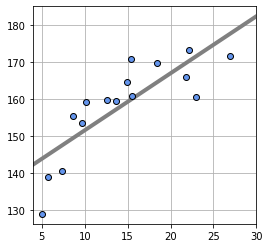

In [42]:
#선표시
def show_line(w):#직선그리기
    xb = np.linspace(X_min,X_max,100)
    y = w[0]*xb +w[1]
    plt.plot(xb,y,color= (.5,.5,.5),linewidth =4)

#메인
plt.figure(figsize=(4,4))
W = np.array([W0,W1])
mse = mse_line(X,T,W)
print('w0={0:.3f},w1={1:.3f}'.format(W0,W1))
print('Sd={0:.3f} cm'.format(np.sqrt(mse)))
show_line(W)
plt.plot(X,T,marker='o',linestyle='None',
        color ='cornflowerblue',markeredgecolor='black')
plt.xlim(X_min,X_max)
plt.grid(True)
plt.show()

In [43]:
#해석해
def fit_line(x,t):
    mx = np.mean(x)#<x>
    mt = np.mean(t)#<t>
    mtx =np.mean(t*x)
    mxx = np.mean(x*x)
    w0 = (mtx-mt*mx)/(mxx-mx**2)
    w1 = mt-w0*mx
    return np.array([w0,w1])#w의 해석해

w0=1.558, w1=135.872
SD=7.001 cm


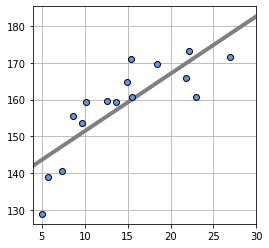

In [44]:
W = fit_line(X,T)
print('w0={0:.3f}, w1={1:.3f}'.format(W[0],W[1]))
mse =mse_line(X,T,W)
print('SD={0:.3f} cm'.format(np.sqrt(mse)))
plt.figure(figsize=(4,4))
show_line(W)
plt.plot(X,T,marker='o',linestyle='None',
        color='cornflowerblue',markeredgecolor='black')
plt.xlim(X_min,X_max)
plt.grid(True)
plt.show()

In [45]:
#2차원 데이터 생성
X0 = X#나이
X0_min = 5
X0_max = 30
np.random.seed(seed=1)#난수를 고정
X1 = 23*(T/100)**2+2*np.random.randn(X_n)#몸무게
X1_min = 40
X1_max = 75

In [46]:
print(np.round(X0,2))#나이
print(np.round(X1,2))#몸무게
print(np.round(T,2))#키

[15.43 23.01  5.   12.56  8.67  7.31  9.66 13.64 14.92 18.47 15.48 22.13
 10.11 26.95  5.68 21.76]
[70.43 58.15 37.22 56.51 57.32 40.84 57.79 56.94 63.03 65.69 62.33 64.95
 57.73 66.89 46.68 61.08]
[170.91 160.68 129.   159.7  155.46 140.56 153.65 159.43 164.7  169.65
 160.71 173.29 159.31 171.52 138.96 165.87]


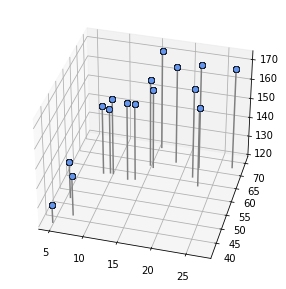

In [47]:
#2차원 데이터의 3차원 플롯의 그래프에 표시
def show_data2(ax,x0,x1,t):
    for i in range(len(x0)):
        ax.plot([x0[i],x0[i]],[x1[i],x1[i]],
               [120,t[i]],color='gray')
        ax.plot(x0,x1,t,'o',
               color='cornflowerblue', markeredgecolor='black',
               markersize=6, markeredgewidth=.5)
        ax.view_init(elev=35, azim=-75)
        
plt.figure(figsize=(6,5))
ax = plt.subplot(1,1,1,projection = '3d')
show_data2(ax,X0,X1,T)
plt.show()

In [48]:
#면모델
#면의 표시
def show_plane(ax,w):#w에 대해 면을 그리는 함수
    px0 = np.linspace(X0_min,X0_max,5)
    px1 = np.linspace(X1_min,X1_max,5)
    px0,px1 = np.meshgrid(px0,px1)
    y = w[0]*px0 + w[1]*px1+w[2]
    
    ax.plot_surface(px0,px1,y,rstride = 1, cstride=1, alpha = .3, color='blue',edgecolor='black')

In [49]:
#면의 MSE
def mse_plane(x0,x1,t,w):
    y = w[0]*x0 + w[1]*x1 + w[2]#면의 함수
    mse = np.mean((y-t)**2)
    return mse

SD=12.876 cm


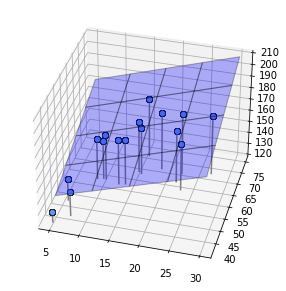

In [50]:
#메인
plt.figure(figsize=(6,5))
ax = plt.subplot(1,1,1,projection = '3d')
W = [1.5,1,90]
show_plane(ax,W)
show_data2(ax,X0,X1,T)
mse = mse_plane(X0,X1,T,W)
print("SD={0:.3f} cm".format(np.sqrt(mse)))
plt.show()

In [53]:
#해석해
def fit_plane(x0,x1,t):
    c_tx0 = np.mean(t*x0)-np.mean(t)*np.mean(x0)#공분산
    c_tx1 = np.mean(t*x1)-np.mean(t)*np.mean(x1)#공분산
    c_x0x1 = np.mean(x0*x1)-np.mean(x0)*np.mean(x1)
    v_x0 = np.var(x0)
    v_x1 = np.var(x1)
    w0 = (c_tx1*c_x0x1 - v_x1+c_tx0)/(c_x0x1**2-v_x0*v_x1)
    w1 = (c_tx0*c_x0x1 - v_x0*c_tx1)/(c_x0x1**2 - v_x0*v_x1)
    w2 = -w0*np.mean(x0)-w1*np.mean(x1)+np.mean(t)
    return np.array([w0,w1,w2])

w0 = -2.9, w1=1.1, w2 = 137.7
SD=21.758 cm


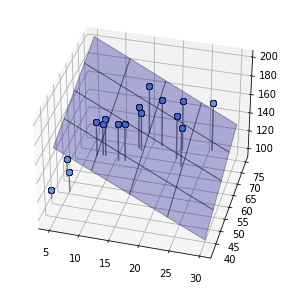

In [54]:
#메인
plt.figure(figsize=(6,5))
ax = plt.subplot(1,1,1,projection = '3d')
W = fit_plane(X0,X1,T)
print('w0 = {0:.1f}, w1={1:.1f}, w2 = {2:.1f}'.format(W[0],W[1],W[2]))
show_plane(ax,W)
show_data2(ax,X0,X1,T)
mse = mse_plane(X0,X1,T,W)
print("SD={0:.3f} cm".format(np.sqrt(mse)))
plt.show()#해석해에 의한 평면 모델의 피팅 결과

In [55]:
outfile = np.load('ch5_data.npz')#데이터로드
X = outfile['X']
X_min = outfile['X_min']
X_max = outfile['X_max']
X_n = outfile['X_n']
T = outfile['T']

In [56]:
#가우스 함수
def gauss(x,mu,s):
    return np.exp(-(x-mu)**2/(2*s**2))

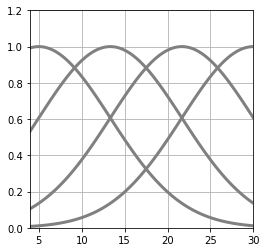

In [58]:
M = 4 #4개의 가우스 함수
plt.figure(figsize=(4,4))
mu =  np.linspace(5,30,M)#5~30 일정 간격으로 배치
s =mu[1]-mu[0]#인접한 가우스 중심 사이의 거리
xb = np.linspace(X_min,X_max,100)

for j in range(M):
    y = gauss(xb,mu[j],s)
    plt.plot(xb,y,color='gray',linewidth = 3)
plt.grid(True)
plt.xlim(X_min,X_max)
plt.ylim(0,1.2)
plt.show()

In [59]:
#선형기저함수모델
def gauss_func(w,x):#가우스 기저 함수
    m = len(w)-1
    mu = np.linspace(5,30,m)
    s = mu[1]-mu[0]
    y = np.zeros_like(x)
    for j in range(m):
        y = y+w[j]*gauss(x,mu[j],s)
    y = y+w[m]
    return y

In [60]:
#선형 기저 함수모델 MSE
def mse_gauss_func(x,t,w):
    y = gauss_func(w,x)
    mse = np.mean((y-t)**2)
    return mse

In [61]:
#선형기저함수모델 정확한 해
def fit_gauss_func(x,t,m):
    mu = np.linspace(5,30,m)
    s = mu[1]-mu[0]
    n = x.shape[0]
    psi = np.ones((n,m+1))
    for j in range(m):
        psi[:,j] = gauss(x,mu[j],s)
    psi_T = np.transpose(psi)
    
    b = np.linalg.inv(psi_T.dot(psi))
    c = b.dot(psi_T)
    w = c.dot(t)
    return w

In [62]:
#가우스 기저 함수 표시
def show_gauss_func(w):#가우스 기저 함수 표시
    xb =np.linspace(X_min,X_max, 100)
    y = gauss_func(w,xb)
    plt.plot(xb,y,c=[.5,.5,.5],lw = 4)

W=[29.4 75.7  2.9 98.3 54.9]
SD = 3.98 cm


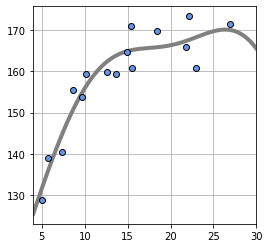

In [63]:
#메인
plt.figure(figsize=(4,4))
M = 4
W = fit_gauss_func(X,T,M)
show_gauss_func(W)#가우스 기저함수 표시
plt.plot(X,T,marker = 'o',linestyle='None',
        color = 'cornflowerblue',markeredgecolor='black')
plt.xlim(X_min,X_max)
plt.grid(True)
mse = mse_gauss_func(X,T,W)
print('W='+str(np.round(W,1)))
print('SD = {0:.2f} cm'.format(np.sqrt(mse)))
plt.show()

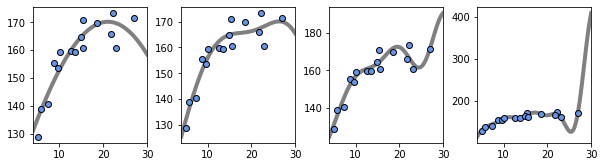

In [68]:
#오버피팅의 문제
#M = 2,4,7,9의 경우 선형기저함수모델에 대한 피팅
plt.figure(figsize =(10,2.5))
plt.subplots_adjust(wspace=0.3)

M =  [2,4,7,9]
for i in range(len(M)):
    plt.subplot(1,len(M),i+1)
    W =fit_gauss_func(X,T,M[i])
    show_gauss_func(W)
    plt.plot(X,T,marker='o',linestyle='None',
            color='cornflowerblue', markeredgecolor='black')
    plt.xlim(X_min,X_max)

In [69]:
#훈련 데이터와 테스트 데이터
X_test = X[:int(X_n/4+1)]#1/4
T_test = T[:int(X_n/4+1)]#1/4
X_train = X[int(X_n/4+1):]
T_train = T[int(X_n/4+1):]

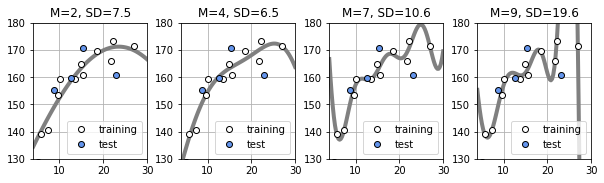

In [70]:
#메인
plt.figure(figsize=(10,2.5))

plt.subplots_adjust(wspace =0.3)
M =[2,4,7,9]
for i in range(len(M)):
    plt.subplot(1,len(M),i+1)
    W = fit_gauss_func(X_train,T_train,M[i])
    show_gauss_func(W)
    plt.plot(X_train,T_train,marker= 'o',
            linestyle='None',color='white',
            markeredgecolor='black',label='training')
    plt.plot(X_test,T_test,marker='o',
            linestyle='None',color='cornflowerblue',
            markeredgecolor='black', label='test')
    plt.legend(loc='lower right', fontsize=10, numpoints=1)
    plt.xlim(X_min,X_max)
    plt.ylim(130,180)
    plt.grid(True)
    mse = mse_gauss_func(X_test,T_test,W)
    plt.title("M={0:d}, SD={1:.1f}".format(M[i],np.sqrt(mse)))

plt.show()

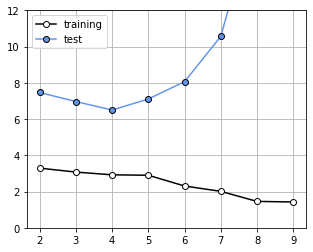

In [74]:
#훈련 데이터와 테스트 데이터의 오차(SD)를 플롯
plt.figure(figsize=(5,4))
M = range(2,10)
mse_train = np.zeros(len(M))
mse_test = np.zeros(len(M))

for i in range(len(M)):
    W = fit_gauss_func(X_train,T_train,M[i])
    mse_train[i] = np.sqrt(mse_gauss_func(X_train,T_train,W))
    mse_test[i] = np.sqrt(mse_gauss_func(X_test,T_test,W))
    
plt.plot(M, mse_train, marker = 'o', linestyle ='-',
        markerfacecolor = 'white',markeredgecolor='black',
        color = 'black',label='training')

plt.plot(M,mse_test, marker = 'o', linestyle='-',
        color = 'cornflowerblue', markeredgecolor='black',
        label = 'test')
plt.legend(loc = 'upper left', fontsize = 10)
plt.ylim(0,12)
plt.grid(True)
plt.show()#M=4의 경우가 가장 데이터에 적합

In [75]:
np.fmod(range(10),5)

array([0, 1, 2, 3, 4, 0, 1, 2, 3, 4], dtype=int32)

In [76]:
#K겹 교차 검증
def kfold_gauss_func(x,t,m,k):#평균제곱오차출력
    n = x.shape[0]
    mse_train = np.zeros(k)
    mse_test = np.zeros(k)
    
    for i in range(0,k):
        x_train = x[np.fmod(range(n),k)!=i]
        t_train = t[np.fmod(range(n),k)!=i]
        x_test = x[np.fmod(range(n),k)==i]
        t_test = t[np.fmod(range(n),k)==i]
        
        wm = fit_gauss_func(x_train,t_train,m)
        mse_train[i] = mse_gauss_func(x_train,t_train,wm)
        mse_test[i] = mse_gauss_func(x_test,t_test,wm)
    return mse_train,mse_test

In [77]:
M = 4
K = 4
kfold_gauss_func(X,T,M,K)

(array([12.87927851,  9.81768697, 17.2615696 , 12.92270498]),
 array([ 39.65348229, 734.70782018,  18.30921743,  47.52459642]))

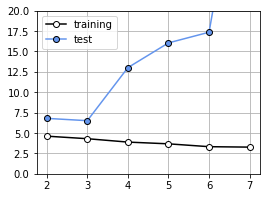

In [78]:
#선형기저함수 모델의 LOOCV
M = range(2,8)#기저수(2~7)
K = 16#분할수

Cv_Gauss_train = np.zeros((K,len(M)))
Cv_Gauss_test = np.zeros((K,len(M)))

for i in range(0,len(M)):
    Cv_Gauss_train[:,i],Cv_Gauss_test[:,i] = kfold_gauss_func(X,T,M[i],K)

mean_Gauss_train = np.sqrt(np.mean(Cv_Gauss_train, axis =0))
mean_Gauss_test = np.sqrt(np.mean(Cv_Gauss_test, axis = 0))

plt.figure(figsize=(4,3))
plt.plot(M,mean_Gauss_train, marker = 'o', linestyle = '-',
        color = 'k', markerfacecolor = 'w',label = 'training')
plt.plot(M,mean_Gauss_test, marker = 'o',linestyle = '-',
        color = 'cornflowerblue', markeredgecolor ='black', label='test')
plt.legend(loc = 'upper left',fontsize=10)
plt.ylim(0,20)
plt.grid(True)
plt.show()

SD=4.37 cm


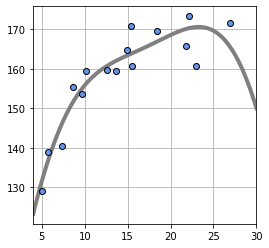

In [79]:
#M = 3 선형기저함수모델의 피팅
M = 3
plt.figure(figsize=(4,4))
W = fit_gauss_func(X,T,M)
show_gauss_func(W)
plt.plot(X,T,marker = 'o',linestyle='None',
        color='cornflowerblue', markeredgecolor='black')
plt.xlim([X_min,X_max])
plt.grid(True)
mse = mse_gauss_func(X,T,W)
print("SD={0:.2f} cm".format(np.sqrt(mse)))
plt.show()

In [80]:
#새로운 모델의 생성
def model_A(x,w):#증가하다가 일정한 값으로 수렴하는 함수
    y = w[0]-w[1]*np.exp(-w[2]*x)
    return y

def show_model_A(w):#표시용 함수
    xb = np.linspace(X_min,X_max,100)
    y = model_A(xb,w)
    plt.plot(xb,y,c = [.5,.5,.5], lw = 4)

In [81]:
def mse_model_A(w,x,t):#MSE를 출력하는 함수
    y = model_A(x,w)
    mse = np.mean((y-t)**2)
    return mse

In [82]:
from scipy.optimize import minimize #매개변수의 극솟값을 출력

def fit_model_A(w_init,x,t):#매개변수의 최적화
    res1 = minimize(mse_model_A,w_init,args = (x,t),method = 'powell')#모델의 mse를 최소화하는 w계산
    return res1.x

w0 = 169.0, w1=113.7,w2=0.2
SD = 3.86 cm


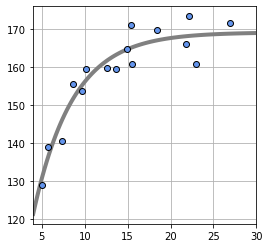

In [83]:
#모델 A에 의한 피팅
plt.figure(figsize=(4,4))
W_init = [100,0,0]
W = fit_model_A(W_init,X,T)
print("w0 = {0:.1f}, w1={1:.1f},w2={2:.1f}".format(W[0],W[1],W[2]))
show_model_A(W)
plt.plot(X,T,marker = 'o',linestyle='None',
        color = 'cornflowerblue',markeredgecolor='black')
plt.xlim(X_min,X_max)
plt.grid(True)
mse = mse_model_A(W,X,T)
print("SD = {0:.2f} cm".format(np.sqrt(mse)))
plt.show()

In [84]:
#모델의 선택
#교차검증 model_A

def kfold_model_A(x,t,k):
    n = len(x)
    mse_train = np.zeros(k)
    mse_test = np.zeros(k)
    for i in range(0,K):
        x_train = x[np.fmod(range(n),k)!=i]
        t_train = t[np.fmod(range(n),k)!=i]
        x_test = x[np.fmod(range(n),k)==i]
        t_test = t[np.fmod(range(n),k)==i]
        wm = fit_model_A(np.array([169,113,0.2]),x_train,t_train)
        mse_train[i] = mse_model_A(wm,x_train,t_train)
        mse_test[i] = mse_model_A(wm,x_test,t_test)
    return mse_train,mse_test


Gauss(M=3) SD=6.51 cm
Model A SD=4.72 cm


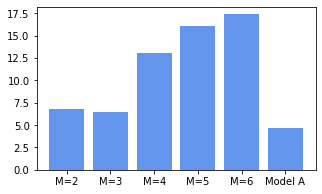

In [85]:
K = 16
Cv_A_train, Cv_A_test = kfold_model_A(X,T,K)
mean_A_test = np.sqrt(np.mean(Cv_A_test))
print("Gauss(M=3) SD={0:.2f} cm".format(mean_Gauss_test[1]))
print("Model A SD={0:.2f} cm".format(mean_A_test))

SD = np.append(mean_Gauss_test[0:5],mean_A_test)
M = range(6)
label = ["M=2","M=3","M=4","M=5","M=6","Model A"]
plt.figure(figsize=(5,3))
plt.bar(M,SD,tick_label = label, align = 'center', facecolor='cornflowerblue')
plt.show()